In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [46]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [44]:
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
  """
  Function to reproduce the 4 base plots of an OLS model in R.

  ---
  Inputs:

  X: A numpy array or pandas dataframe of the features to use in building the linear regression model

  y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

  model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
  """

  if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

  print(model_fit.summary())

  # create dataframe from X, y for easier plot handling
  dataframe = pd.concat([X, y], axis=1)

  # model values
  model_fitted_y = model_fit.fittedvalues
  # model residuals
  model_residuals = model_fit.resid
  # normalized residuals
  model_norm_residuals = model_fit.get_influence().resid_studentized_internal
  # absolute squared normalized residuals
  model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
  # absolute residuals
  model_abs_resid = np.abs(model_residuals)
  # leverage, from statsmodels internals
  model_leverage = model_fit.get_influence().hat_matrix_diag
  # cook's distance, from statsmodels internals
  model_cooks = model_fit.get_influence().cooks_distance[0]

  plot_lm_1 = plt.figure()
  plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y,
                            lowess=True,
                            scatter_kws={'alpha': 0.5},
                            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

  plot_lm_1.axes[0].set_title('Residuals vs Fitted')
  plot_lm_1.axes[0].set_xlabel('Fitted values')
  plot_lm_1.axes[0].set_ylabel('Residuals')

  # annotations
  abs_resid = model_abs_resid.sort_values(ascending=False)
  abs_resid_top_3 = abs_resid[:3]
  for i in abs_resid_top_3.index:
      plot_lm_1.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_residuals[i]))

  QQ = ProbPlot(model_norm_residuals)
  plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
  plot_lm_2.axes[0].set_title('Normal Q-Q')
  plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
  plot_lm_2.axes[0].set_ylabel('Standardized Residuals')
  # annotations
  abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
  abs_norm_resid_top_3 = abs_norm_resid[:3]
  for r, i in enumerate(abs_norm_resid_top_3):
      plot_lm_2.axes[0].annotate(i,
                                 xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                     model_norm_residuals[i]));

  plot_lm_3 = plt.figure()
  plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
  sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
  plot_lm_3.axes[0].set_title('Scale-Location')
  plot_lm_3.axes[0].set_xlabel('Fitted values')
  plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

  # annotations
  abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
  abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
  for i in abs_norm_resid_top_3:
      plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]))


#   plot_lm_4 = plt.figure()
#   plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
#   sns.regplot(model_leverage, model_norm_residuals,
#               scatter=False,
#               ci=False,
#               lowess=True,
#               line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
#   plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
#   plot_lm_4.axes[0].set_ylim(-3, 5)
#   plot_lm_4.axes[0].set_title('Residuals vs Leverage')
#   plot_lm_4.axes[0].set_xlabel('Leverage')
#   plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

#   # annotations
#   leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
#   for i in leverage_top_3:
#       plot_lm_4.axes[0].annotate(i,
#                                  xy=(model_leverage[i],
#                                      model_norm_residuals[i]))

#   p = len(model_fit.params) # number of model parameters
#   graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
#         np.linspace(0.001, max(model_leverage), 50),
#         'Cook\'s distance') # 0.5 line
#   graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
#         np.linspace(0.001, max(model_leverage), 50)) # 1 line
#   plot_lm_4.legend(loc='upper right')

  return model_fit

**Вариант 3**

Задача 1

In [4]:
x = [np.random.uniform(0, 1, i) for i in (10, 100, 1000)]



 10 0.1 

                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2534.
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           2.68e-11
Time:                        08:47:38   Log-Likelihood:                 11.801
No. Observations:                  10   AIC:                            -19.60
Df Residuals:                       8   BIC:                            -19.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9763      0.063    -15

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


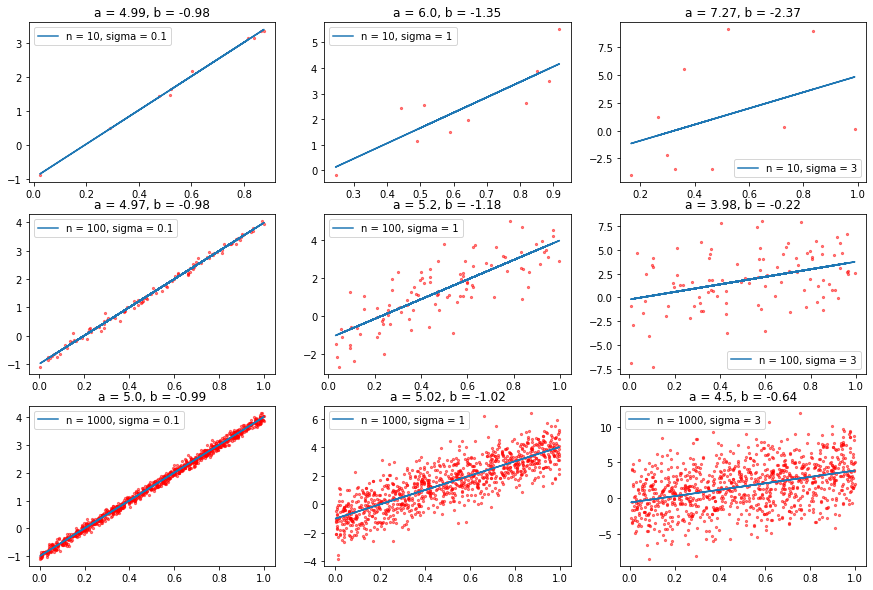

In [5]:
i = 1
plt.figure(figsize = (15, 10))
for n in [10, 100, 1000]:
    for sigma in [0.1, 1, 3]:
        x = np.random.uniform(0, 1, n)
        eps = np.random.normal(0, sigma, n)
        y = 5*x - 1 + eps
        intercept = np.ones(n)

        model = sm.OLS(y, sm.add_constant(x))
        results = model.fit()
        print('\n\n',n, sigma, '\n\n', results.summary())

        plt.subplot(3,3,i)


        plt.scatter(x,y, color='r', alpha=0.5, s=5)
        plt.plot(x, results.params[1] * x + results.params[0], label = 'n = {}, sigma = {}'.format(n, sigma))
        plt.title('a = {}, b = {}'.format(results.params[1].round(2), results.params[0].round(2)))
        plt.legend()
        i += 1

        # prediction
        for pr in [0.5, 2, 25]:
            prediction = results.params[1] * pr + results.params[0]
            print('При x = {} получаем предсказание y = {}'.format(pr, prediction))     

Задача 2

- Первый график: Видим, что относительно нуля положительные и отрицательные отстатики распределены равномерно, среднее этих остатков находится в окрестности нуля, а таже удаляясь от нуля влево и вправо происходит уширение разброса остаткой. По итогу, можно сказать, что выполнены условние адекватности модели и некоррелированности ошибок, и невыполнении гомоскедастичности.
- Второй график показывает Q-Q plot для нормального распределения ошибкой. Видим, что точки хорошо ложатся на прямую;
- На третьем графике видно, что кривую, а не горизонтальную прямую, поэтому можно предположить отсутсвие гомоскедастичности.

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1495.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          8.49e-301
Time:                        18:21:00   Log-Likelihood:                -3192.3
No. Observations:                1000   AIC:                             6391.
Df Residuals:                     997   BIC:                             6405.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0460      0.187     -0.246      0.8

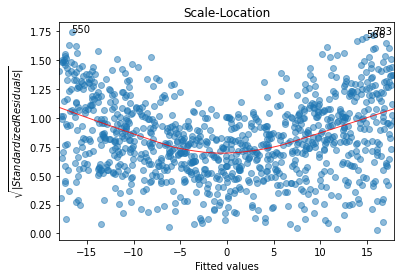

In [49]:
for sigma in [0.5, 2, 5]:
    x1 = np.random.uniform(-6,6, 1000)
    x2 = np.random.uniform(-6,6, 1000)
    eps = np.random.uniform(-sigma, sigma, 1000)

    y = x1 * np.absolute(x2) + np.log(1+np.absolute(x2))*eps

    plt.figure(figsize=(14, 8))

    plt.subplot(1, 2, 1)
    plt.scatter(x1, y,)
    plt.subplot(1, 2, 2)
    plt.scatter(x2, y,)
    plt.show()

    model = diagnostic_plots(pd.DataFrame([x1, x2]).T, pd.DataFrame(y))
    print(het_breuschpagan(model.resid, model.model.exog))

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

- Первый график: Видим, что относительно нуля положительные и отрицательные отстатики распределены равномерно, среднее этих остатков находится в окрестности нуля, а таже удаляясь от нуля влево и вправо происходит уширение разброса остаткой. По итогу, можно сказать, что выполнены условние адекватности модели и некоррелированности ошибок, и невыполнении гомоскедастичности.
-  Второй график показывает Q-Q plot для нормального распределения ошибкой. Видим, что точки хорошо ложатся на прямую;
-  На третьем графике видно, что кривую, а не горизонтальную прямую, поэтому можно предположить отсутсвие гомоскедастичности.

Задача 3

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     14.05
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.15e-07
Time:                        13:52:40   Log-Likelihood:                -305.16
No. Observations:                 100   AIC:                             618.3
Df Residuals:                      96   BIC:                             628.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2972      2.137      1.543      0.1

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-

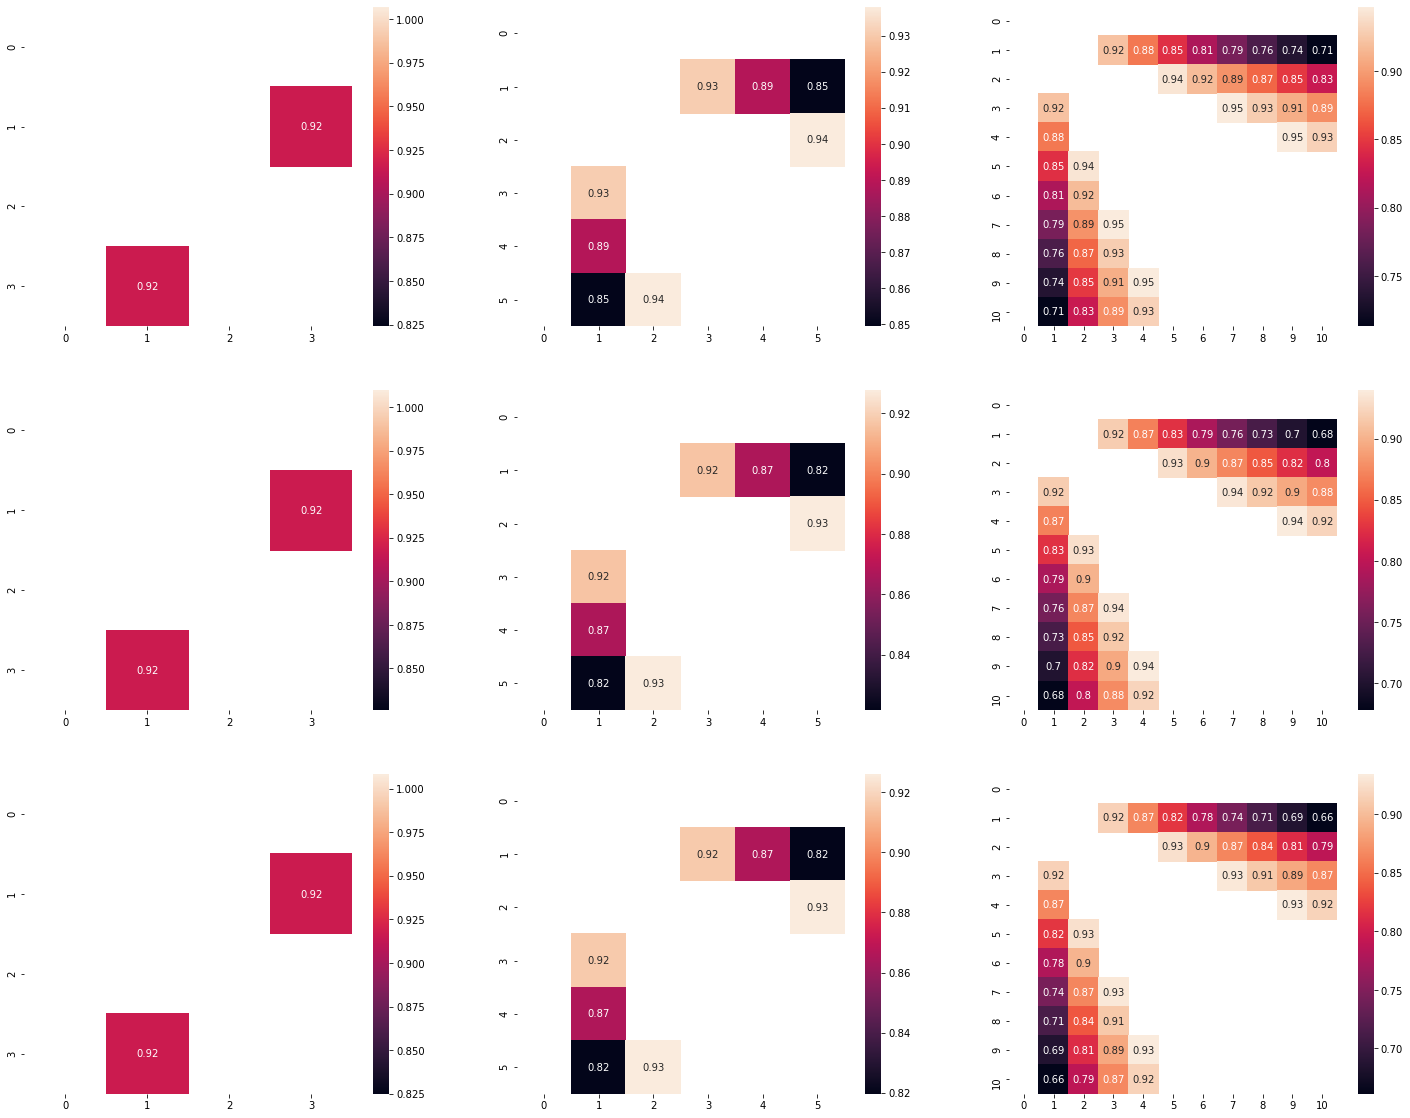

In [243]:

plt.figure(figsize = (25, 20))

sigma = 5
for n in [100, 1000, 10000]:
    for m in [3, 5, 10]:
        x = np.random.uniform(0, 1, n)
        eps = np.random.normal(0, sigma, n)
        xx = np.array([np.power(x, i) for i in range(0,m+1)])
        y = 5 * np.sum(xx, axis = 0)+eps

        model = sm.OLS(y, sm.add_constant(xx.T))
        results = model.fit()
        print(results.summary())

        plt.subplot(3,3,i)

        sns.heatmap(pd.DataFrame(xx.T).corr(), annot=True, mask=pd.DataFrame(xx.T).corr() >= 0.95)
    
        #plt.scatter(x,y, color='r', alpha=0.5, s=5)
        #plt.title('n = {}, m = {}'.format(n,m))

        tmp = xx.T
        vif = np.array([variance_inflation_factor(tmp,i) for i in range(tmp.shape[1])])
        print(vif)

        i+=1



In [200]:
def generate_model(m, n, sigma = 5):
    x = np.random.uniform(0, 1, n)
    eps = np.random.normal(0, sigma, n)
    xx = np.array([np.power(x, i) for i in range(0,m+1)])
    y = 5 * np.sum(xx, axis = 0)+eps

    model = sm.OLS(y, xx.T).fit()
    return pd.DataFrame(xx.T), x, y, model
    

|-| for full fitted model:  15.926624230213168
|-| for cleaned model:  16.579635071025795


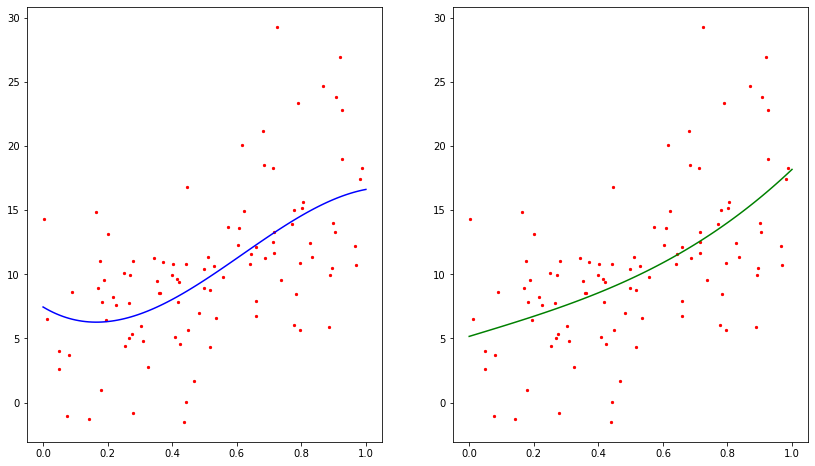

In [210]:
sigma = 5

xx, x, y, model = generate_model(3, 100, sigma)
cols = [0, 1, 3]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i, i**3]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))


|-| for full fitted model:  19.332990146250182
|-| for cleaned model:  19.285700028339363


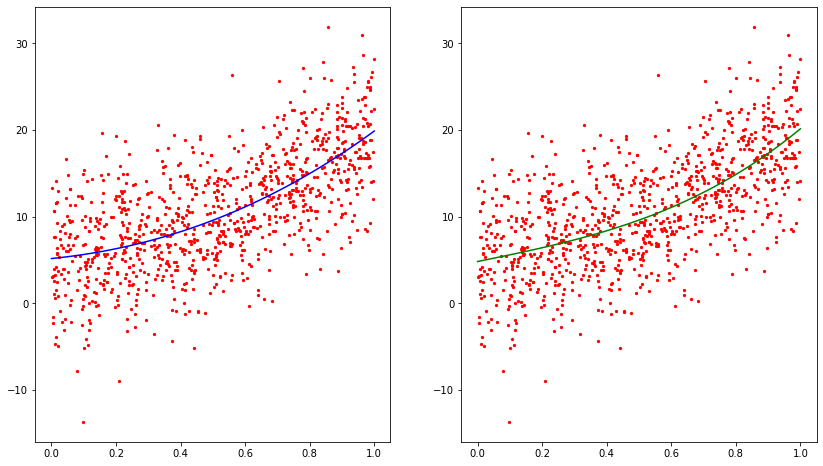

In [211]:
sigma = 5

xx, x, y, model = generate_model(3, 1000, sigma)
cols = [0, 1, 3]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i, i**3]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))


|-| for full fitted model:  20.603023342067946
|-| for cleaned model:  20.510692000530362


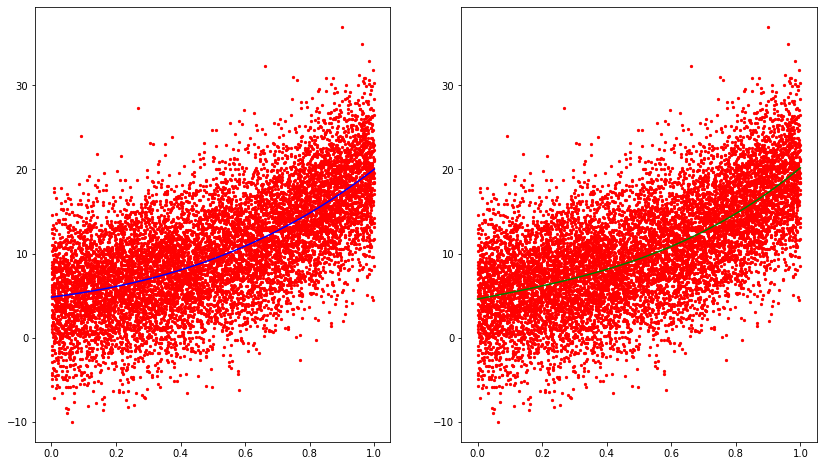

In [212]:
sigma = 5

xx, x, y, model = generate_model(3, 10000, sigma)
cols = [0, 1, 3]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i, i**3]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))


|-| for full fitted model:  13.585863847982697
|-| for cleaned model:  14.359140697792691


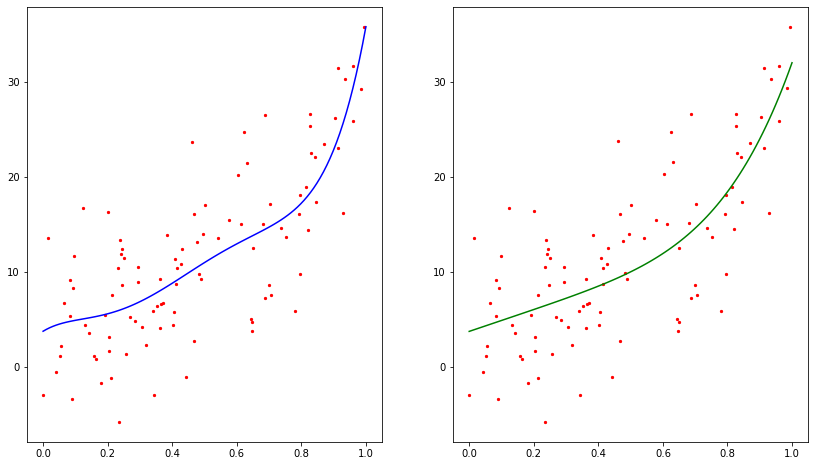

In [235]:
sigma = 5

xx, x, y, model = generate_model(5, 100, sigma)
cols = [0, 1, 5]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3, i**4, i**5]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i, i**5]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))

|-| for full fitted model:  17.991894511832562
|-| for cleaned model:  17.73953548642862


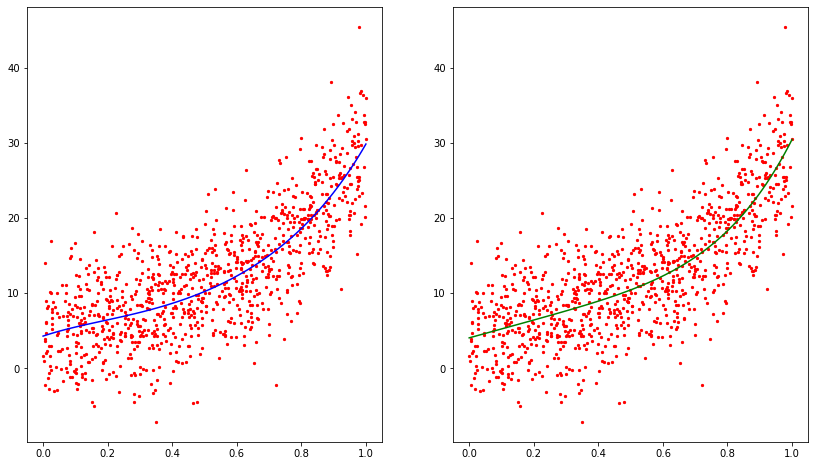

In [228]:
sigma = 5

xx, x, y, model = generate_model(5, 1000, sigma)
cols = [0, 1, 5]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3, i**4, i**5]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i, i**5]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))

|-| for full fitted model:  19.802866455869154
|-| for cleaned model:  19.543606030702826


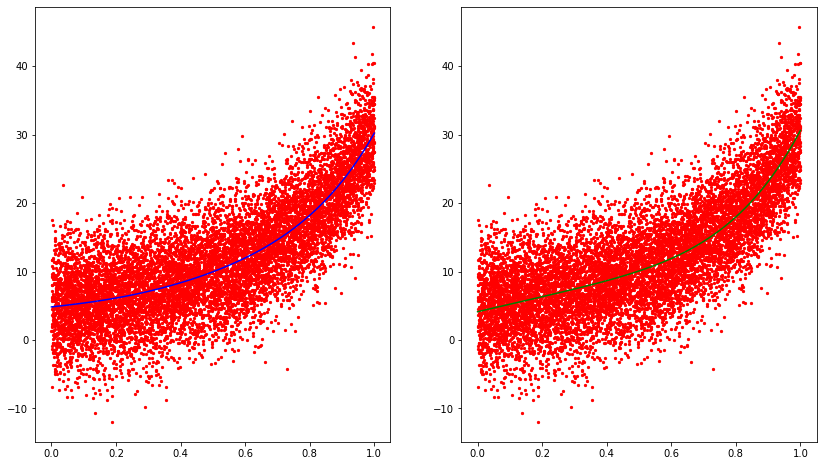

In [227]:
sigma = 5

xx, x, y, model = generate_model(5, 10000, sigma)
cols = [0, 1, 5]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3, i**4, i**5]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i, i**5]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))

|-| for full fitted model:  11.59464275080532
|-| for cleaned model:  11.622267377500876


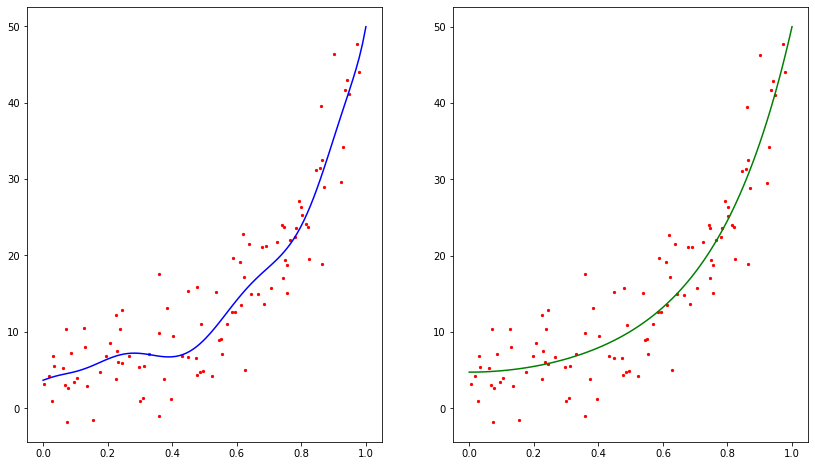

In [240]:
sigma = 5

xx, x, y, model = generate_model(10, 100, sigma)
cols = [0, 2, 5, 9]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3, i**4, i**5, i**6, i**7, i**8, i**9, i**10]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i**2, i**5, i**9]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))

|-| for full fitted model:  15.782573910805581
|-| for cleaned model:  15.049670941961867


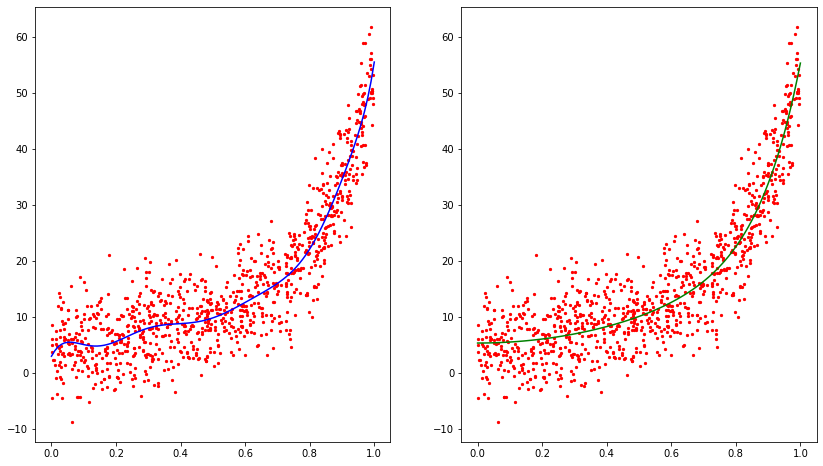

In [241]:
sigma = 5

xx, x, y, model = generate_model(10, 1000, sigma)
cols = [0, 2, 5, 9]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3, i**4, i**5, i**6, i**7, i**8, i**9, i**10]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i**2, i**5, i**9]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))

|-| for full fitted model:  22.122474030782314
|-| for cleaned model:  22.076902564097985


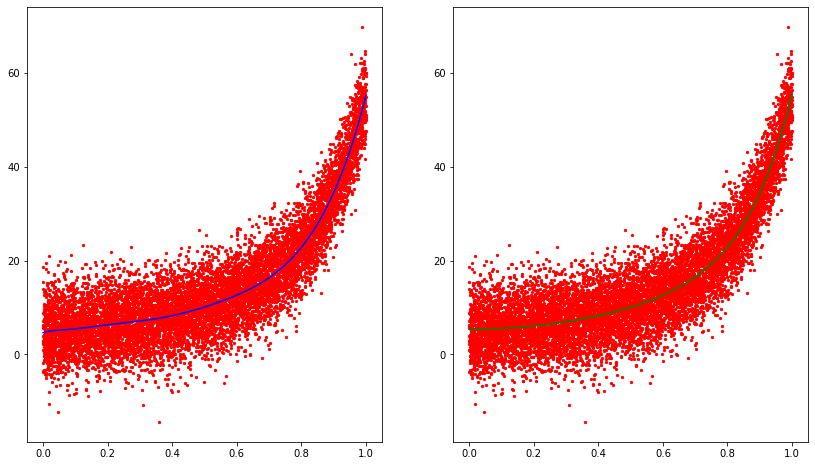

In [242]:
sigma = 5

xx, x, y, model = generate_model(10, 10000, sigma)
cols = [0, 2, 5, 9]
xx_chosen = xx[cols]

model_reduced = sm.OLS(y, sm.add_constant(xx_chosen))
results_reduce = model_reduced.fit()


plt.figure(figsize=(14, 8))

x1 = np.linspace(0,1,100)
y1 = []
for i in x1:
    y1.append(model.predict([1, i, i**2, i**3, i**4, i**5, i**6, i**7, i**8, i**9, i**10]))

x2 = x1
y2 = []
for i in x2:
    y2.append(results_reduce.predict([1, i**2, i**5, i**9]))

plt.subplot(1, 2, 1)
plt.plot(x1, y1, 'b')
plt.scatter(x, y, color = 'r', s=5)
plt.subplot(1, 2, 2)
plt.plot(x2, y2, 'g')
plt.scatter(x, y, color = 'r', s=5)
plt.show()

print('|-| for full fitted model: ', np.max(np.absolute(y - model.fittedvalues)))
print('|-| for cleaned model: ', np.max(np.absolute(y - results_reduce.fittedvalues)))